**Using Logistic regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#set style
sns.set_style('whitegrid')

**Step-by- Step Plan**

step:1 load and inspect the dataset

step:2 clean and preprocess the data

step3: Analyze funding trends over time

step4: Identify top funded sectors, cities,startups

step5: Analyze investor behavior

step:6 Analyze investment types and steps

**1.Load and Ispect the Dataset**

objective:Understand the structure and data quality

In [ ]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  df = pd.read_excel(filename)
  return df

filepath="/content/drive/MyDrive/Day1"
filename="startup_funding123.xlsx"
df = readcsv(filepath, filename)

In [ ]:
#inspect first few rows
print("First 5 rows")
print(df.head())




First 5 rows
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private

In [ ]:
#basic info
print("\n Datset Info")
print(df.info())


 Datset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SNo                2372 non-null   int64  
 1   Date               2372 non-null   object 
 2   StartupName        2372 non-null   object 
 3   Industry_Vertical  2201 non-null   object 
 4   SubVertical        1436 non-null   object 
 5   City_Location      2193 non-null   object 
 6   Investors_Name     2364 non-null   object 
 7   InvestmentType     2371 non-null   object 
 8   Amount_In_INR      1525 non-null   float64
 9   Remarks            419 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 185.4+ KB
None


In [ ]:
#check for missing values
print("\n Missing Values")
df.isnull().sum()


 Missing Values


,0
SNo,0
Date,0
StartupName,0
Industry_Vertical,171
SubVertical,936
City_Location,179
Investors_Name,8
InvestmentType,1
Amount_In_INR,847
Remarks,1953


In [ ]:
df.columns


Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
#fill missing values
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Not Specified')

In [ ]:
#convert date column to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
#Apply the function
df['Amount_In_INR'] = df[ 'Amount_In_INR'].fillna(df['Amount_In_INR'].median())


In [ ]:
#save Cleaned data
df.to_csv('cleaned_startup_funding.csv', index=False)

**Step:3 Funding Trends Over Time**

Objective:Anaylyze hoe funding has evolved year-over-year and month-over-month


In [ ]:
df.Year.unique()

array([2017., 2016., 2015.,   nan])

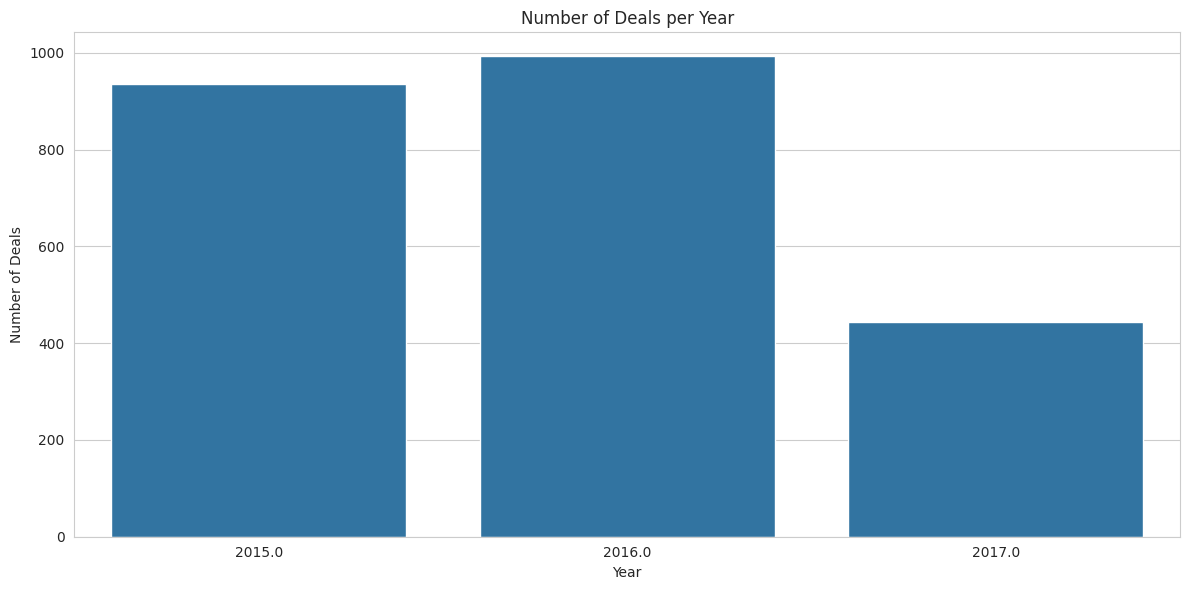

In [ ]:
#number of deals per year
plt.figure(figsize=(12,6))
sns.countplot(x='Year',data=df)
plt.title('Number of Deals per Year')
plt.xlabel('Year')
plt.ylabel('Number of Deals')

plt.tight_layout()
plt.show()

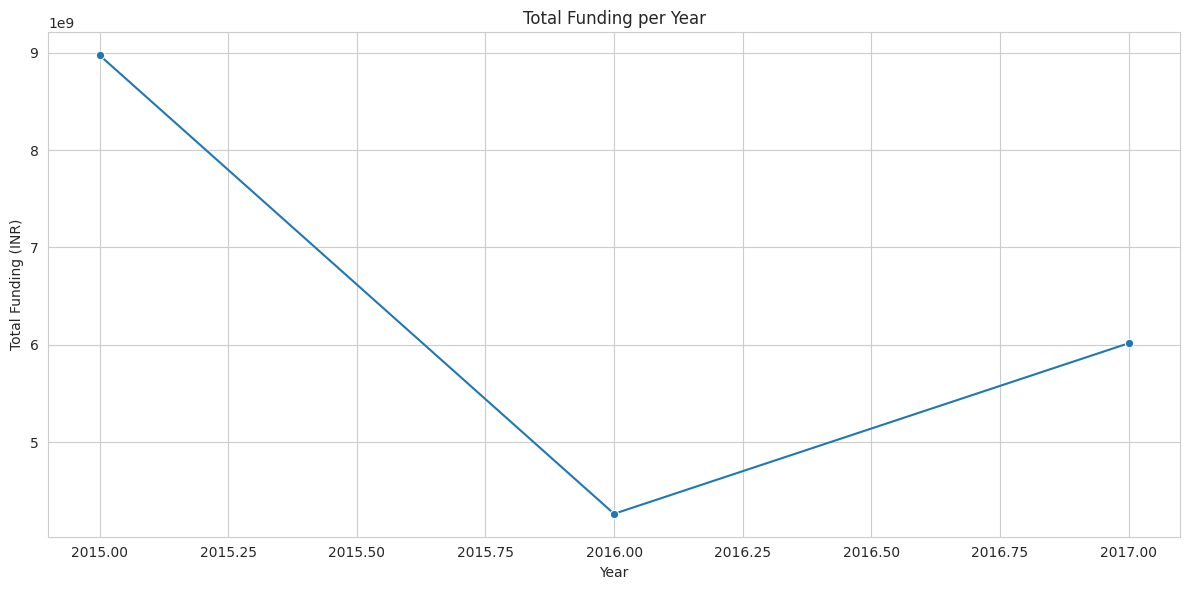

In [ ]:
#total funding per year
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')
plt.title('Total Funding per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Step 4: Top Funding sectors**


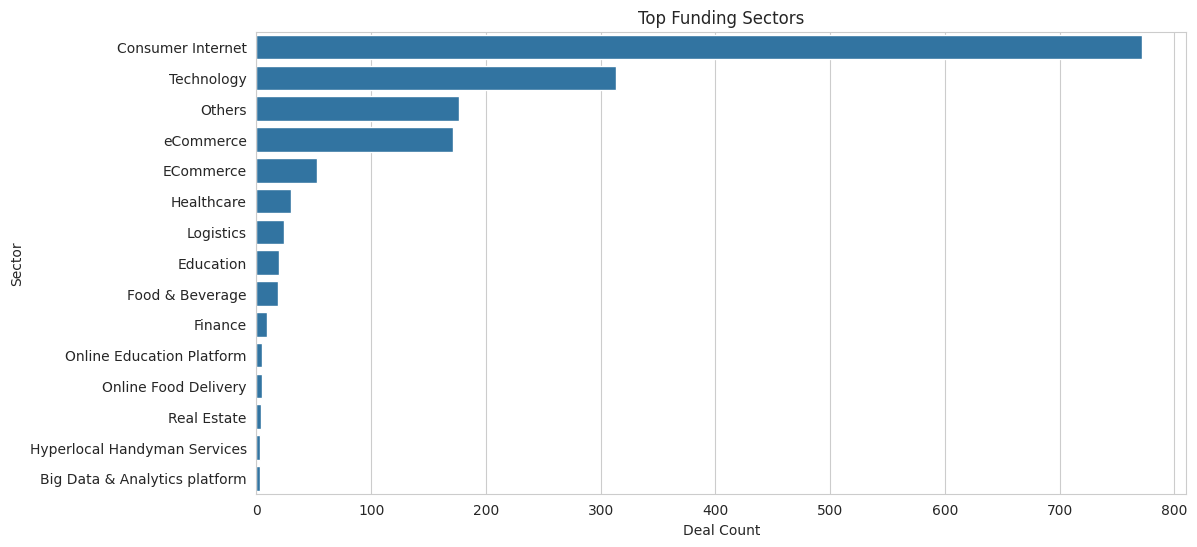

In [ ]:
#top sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title('Top Funding Sectors')
plt.xlabel('Deal Count')
plt.ylabel('Sector')
plt.show()

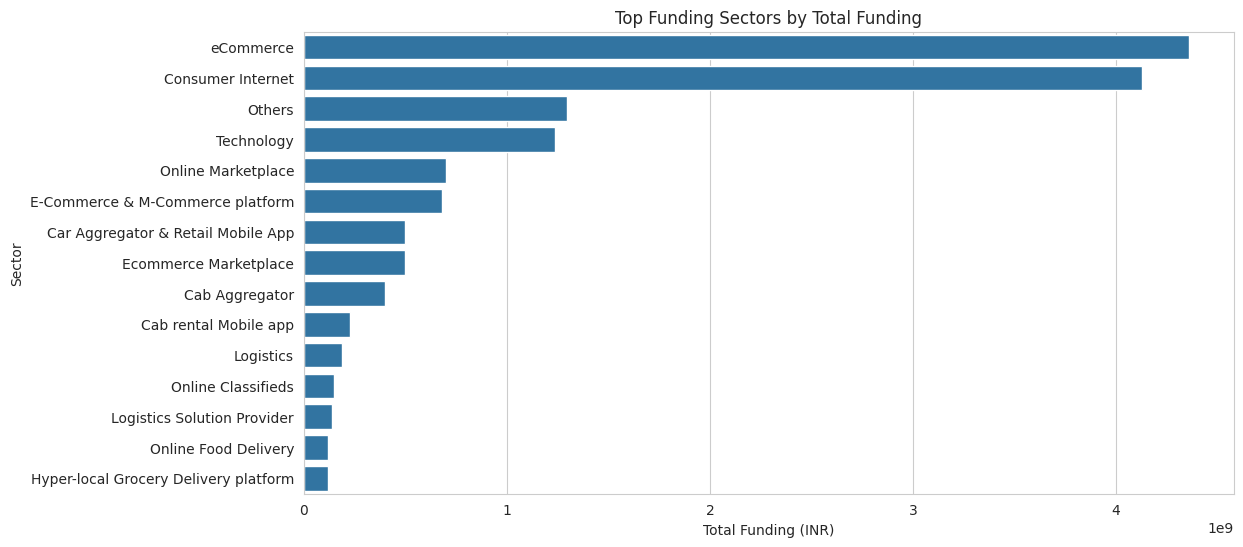

In [ ]:
# Top sectors by total funding
df['Industry_Vertical']= df['Industry_Vertical'].replace({'ECommerce':'eCommerce'})
top_sectors_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_sectors_funding.values, y=top_sectors_funding.index)
plt.title('Top Funding Sectors by Total Funding')
plt.xlabel('Total Funding (INR)')
plt.ylabel('Sector')
plt.show()

In [ ]:
#Split multiple investors and count
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
investors_df

,StartupName,Investors_Name,Amount_In_INR
0,TouchKin,Kae Capital,1300000.0
1,Ethinos,Triton Investment Advisors,1070000.0
2,Leverage Edu,Kashyap Deorah,1070000.0
2,Leverage Edu,Anand Sankeshwar,1070000.0
2,Leverage Edu,Deepak Jain,1070000.0
...,...,...,...
2368,Graphene,Karsemven Fund,825000.0
2369,Mad Street Den,Exfinity Fund,1500000.0
2369,Mad Street Den,Growx Ventures.,1500000.0
2370,Simplotel,Makemytrip,1070000.0


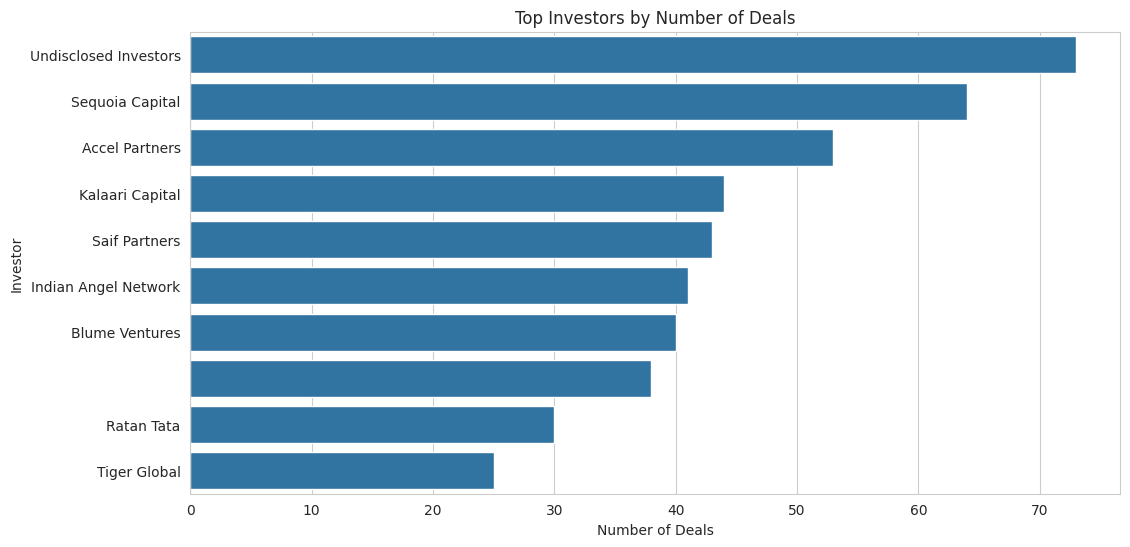

In [ ]:
# top investors by number of deals
top_investors_deals = investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_investors_deals.values, y=top_investors_deals.index)
plt.title('Top Investors by Number of Deals')
plt.xlabel('Number of Deals')
plt.ylabel('Investor')
plt.show()

**Step 6:Investment Type Analysis**


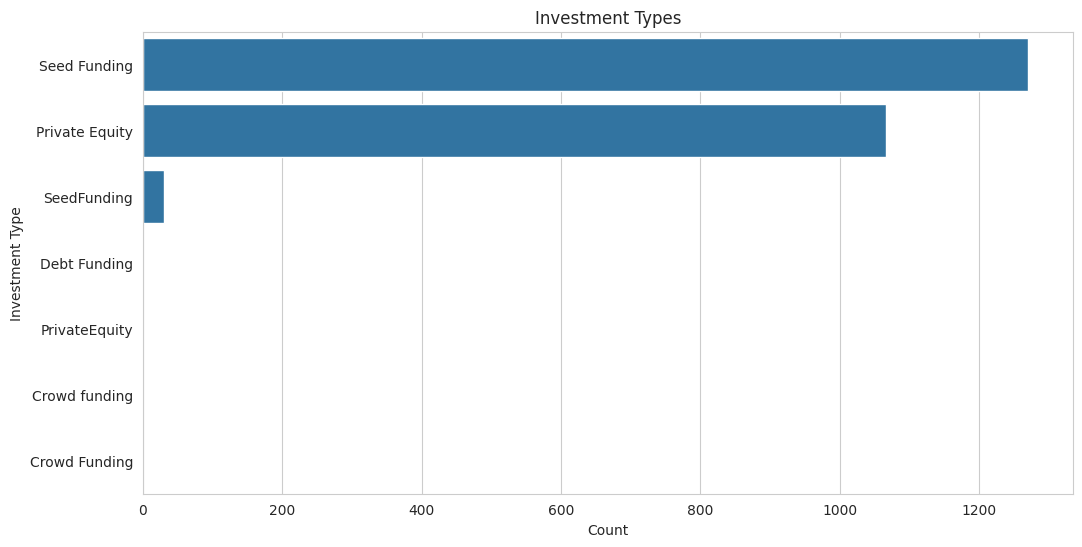

In [ ]:
investment_type = df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=investment_type.values, y=investment_type.index)
plt.title('Investment Types')
plt.xlabel('Count')
plt.ylabel('Investment Type')
plt.show()


**Step 7:Correlation between Sector and Investment**


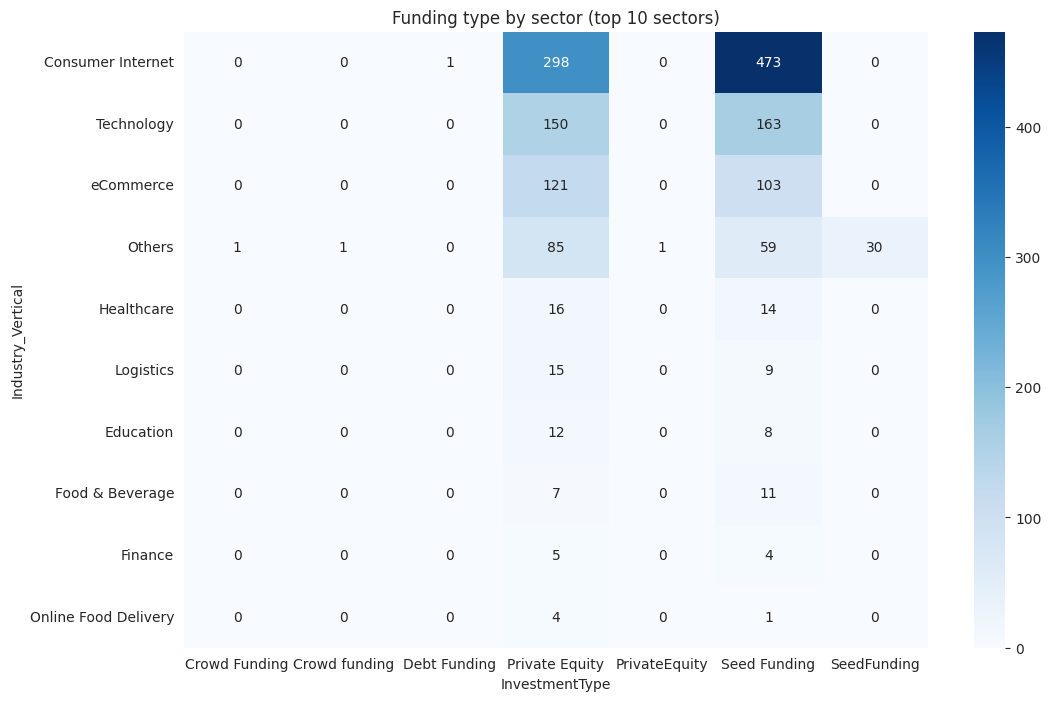

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage= sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]
plt.figure(figsize=(12,8))
sns.heatmap(sector_stage, annot=True, fmt="d", cmap="Blues")
plt.title("Funding type by sector (top 10 sectors)")
plt.show()

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage= sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]
sector_stage

InvestmentType,Crowd Funding,Crowd funding,Debt Funding,Private Equity,PrivateEquity,Seed Funding,SeedFunding
Industry_Vertical,,,,,,,
Consumer Internet,0,0,1,298,0,473,0
Technology,0,0,0,150,0,163,0
eCommerce,0,0,0,121,0,103,0
Others,1,1,0,85,1,59,30
Healthcare,0,0,0,16,0,14,0
Logistics,0,0,0,15,0,9,0
Education,0,0,0,12,0,8,0
Food & Beverage,0,0,0,7,0,11,0
Finance,0,0,0,5,0,4,0


**Step:8 Funding and distribution**

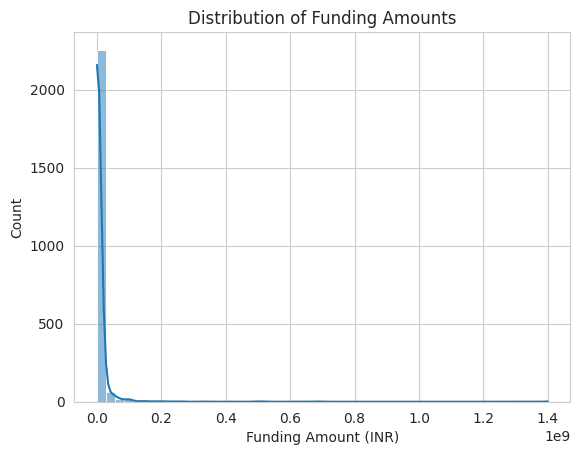

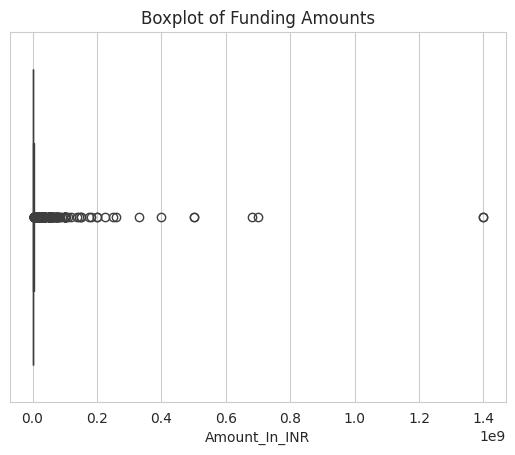

In [ ]:
sns.histplot(df['Amount_In_INR'], bins=50 , kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (INR)')
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title('Boxplot of Funding Amounts')

plt.show()

**Step: 9**

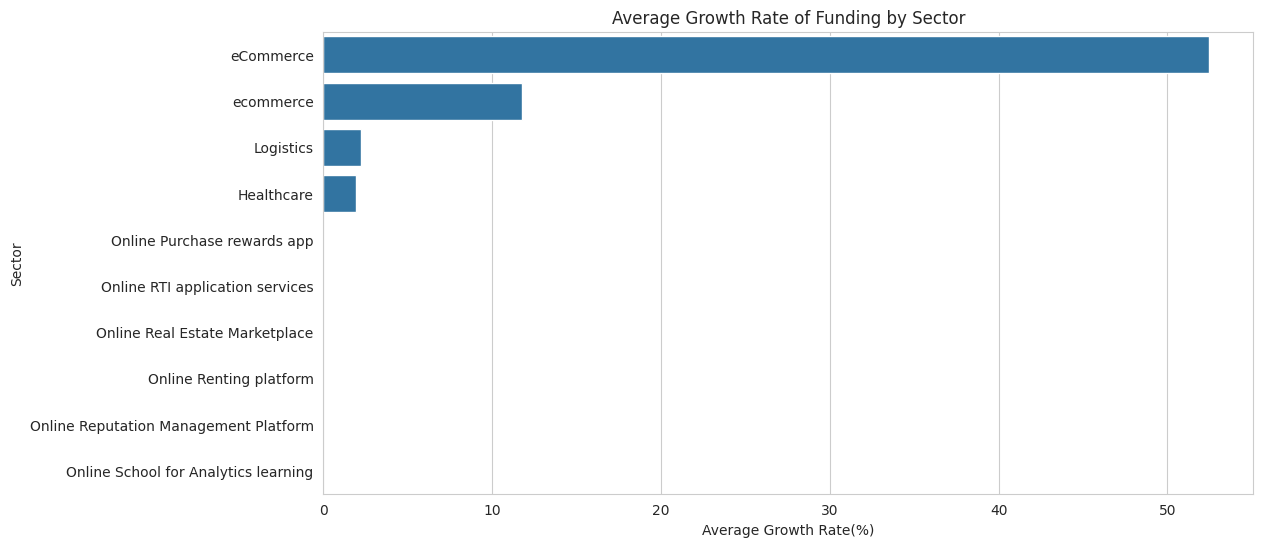

In [ ]:
# Fill NaN values in 'Amount_In_INR' with the median before grouping
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

sector_yearly = df.groupby(['Year', 'Industry_Vertical'])['Amount_In_INR'].sum().unstack()
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_growth.values, y=sector_growth.index)
plt.title('Average Growth Rate of Funding by Sector')
plt.xlabel('Average Growth Rate(%)')
plt.ylabel('Sector')
plt.show()

**Step 10**

In [ ]:
investors_df = df[['StartupName','Investors_Name','Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
investors_df

,StartupName,Investors_Name,Amount_In_INR
0,TouchKin,Kae Capital,1300000.0
1,Ethinos,Triton Investment Advisors,1070000.0
2,Leverage Edu,Kashyap Deorah,1070000.0
2,Leverage Edu,Anand Sankeshwar,1070000.0
2,Leverage Edu,Deepak Jain,1070000.0
...,...,...,...
2368,Graphene,Karsemven Fund,825000.0
2369,Mad Street Den,Exfinity Fund,1500000.0
2369,Mad Street Den,Growx Ventures.,1500000.0
2370,Simplotel,Makemytrip,1070000.0


In [ ]:
def classify_investor(name):
  name = name.lower()
  if any(word in name for word in['capital','ventures','partners','fund','vc','labs']):
      return 'VC'
  elif any(word in name for word in ['angel','network']):
      return 'Angel'
  elif any(word in name for word in ['crop','limited','pvt','inc']):
       return 'Corporate'
  else:
    return 'other'

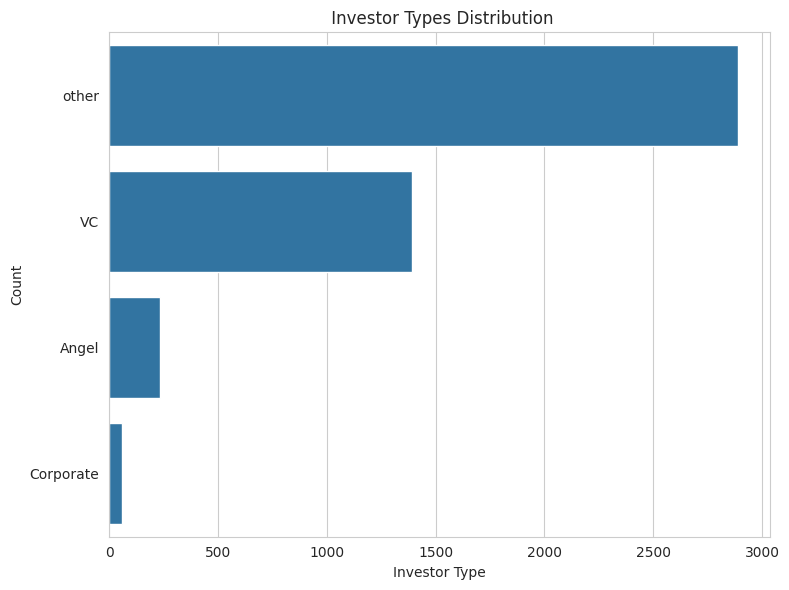

In [ ]:
investors_df['Investor_Type'] = investors_df['Investors_Name'].apply(classify_investor)
investor_type_counts = investors_df['Investor_Type'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=investor_type_counts.values, y=investor_type_counts.index)
plt.title(" Investor Types Distribution")
plt.xlabel("Investor Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
investors_df = df[['StartupName','Investors_Name']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
#count how many times as investor invested in the same startup
investor_startup_counts = investors_df.groupby(['Investors_Name','StartupName']).size().reset_index(name='DealCount')
repeating_investors = investor_startup_counts[investor_startup_counts['DealCount'] > 1]
repeating_investor_summary = repeating_investors['Investors_Name'].value_counts().head()



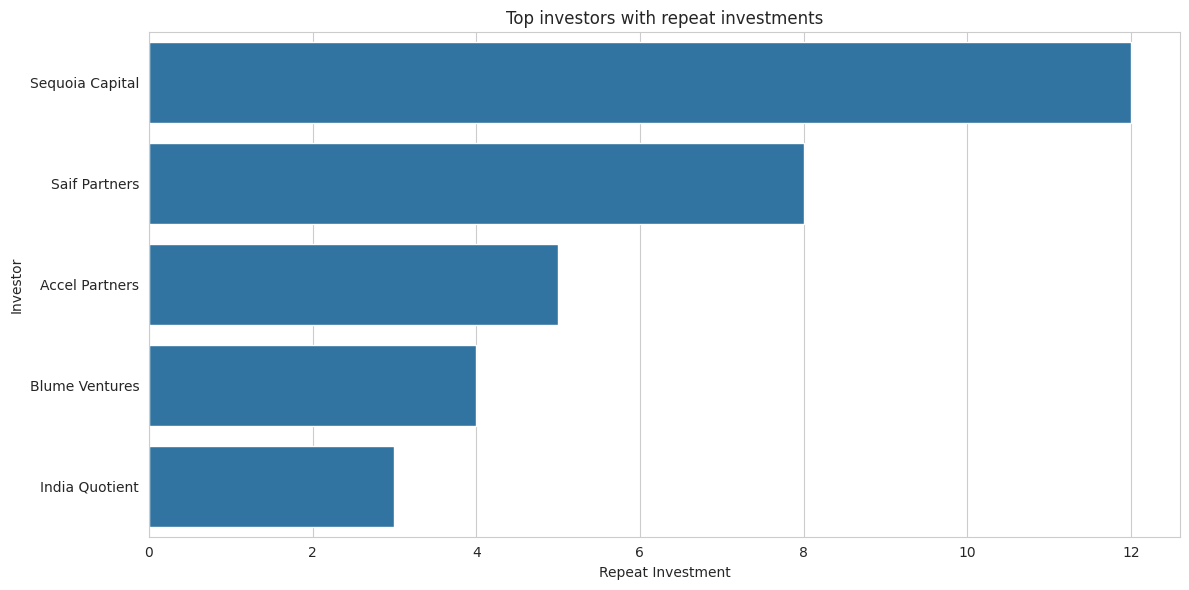

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=repeating_investor_summary.values, y=repeating_investor_summary.index)
plt.title('Top investors with repeat investments')
plt.xlabel('Repeat Investment')
plt.ylabel('Investor')
plt.tight_layout()
plt.show()

Funding atage analysis


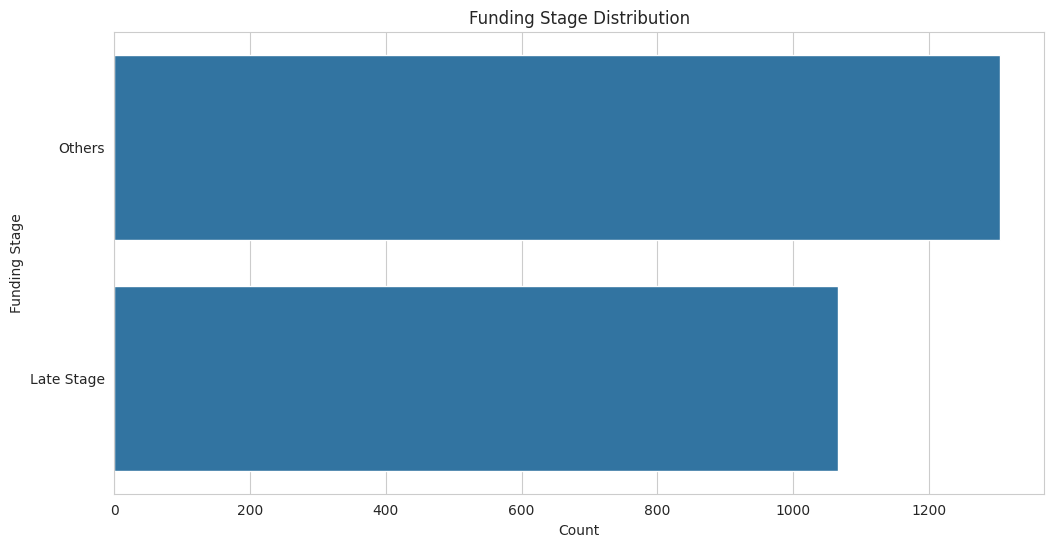

In [ ]:
#define stage categories
early_stage = ['Seed','Pre-Seed','Angel']

late_stage = ['Series A','Series B','Series C','Series D', 'Series E','Private Equity','Venture Debt','Debt Funding']
df['Funding_Stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_Stage'].apply(lambda x: 'Early Stage' if x in early_stage else ('Late Stage') if x in late_stage else 'Others')

#plot
plt.figure(figsize=(12,6))
sns.countplot(y='Funding_Stage',data=df, order=df['Funding_Stage'].value_counts().index)
plt.title('Funding Stage Distribution')
plt.xlabel('Count')
plt.ylabel('Funding Stage')
plt.show()

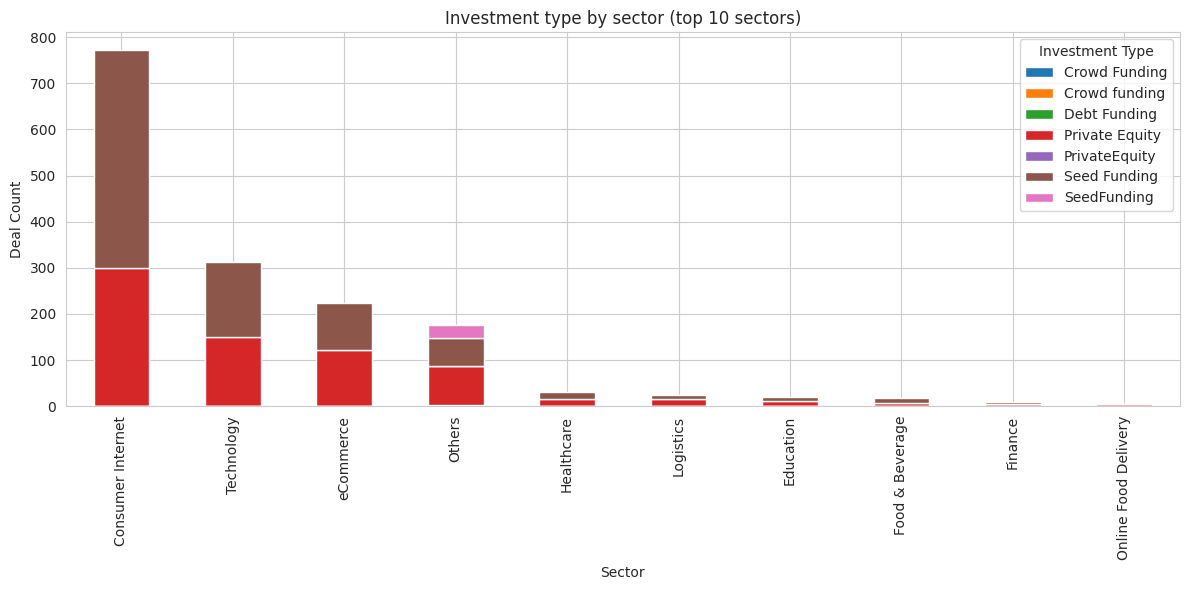

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage= sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Investment type by sector (top 10 sectors)")
plt.xlabel("Sector")
plt.ylabel("Deal Count")
plt.legend(title='Investment Type')
plt.tight_layout()
plt.show()